In [1]:
import numpy as np
import pandas as pd
import math 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [2]:
pwd

'/Users/stefstroke/Desktop/100/ds100finalProject/data100-final'

In [3]:
state_path = "cleaned_state.csv"
confirmed_path = "combined_confirmed_time.csv"
death_path = "combined_death_time.csv"

#states and its metadata, 
state_df = pd.read_csv(state_path)
confirmed_df = pd.read_csv(confirmed_path)
death_df = pd.read_csv(death_path)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
confirmed_df.columns.values

array(['Unnamed: 0', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2',
       'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
       '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20'

In [5]:
data = confirmed_df.loc[:, ['UID', 'Lat', 'Long_']]
X = data.drop(["UID"], axis = 1)
data.head(), X.head()

(        UID        Lat      Long_
 0  84001001  32.539527 -86.644082
 1  84001003  30.727750 -87.722071
 2  84001003  30.727750 -87.722071
 3  84013009  33.068823 -83.247017
 4  84013009  33.068823 -83.247017,          Lat      Long_
 0  32.539527 -86.644082
 1  30.727750 -87.722071
 2  30.727750 -87.722071
 3  33.068823 -83.247017
 4  33.068823 -83.247017)

Text(0.5, 1.0, 'counties by position')

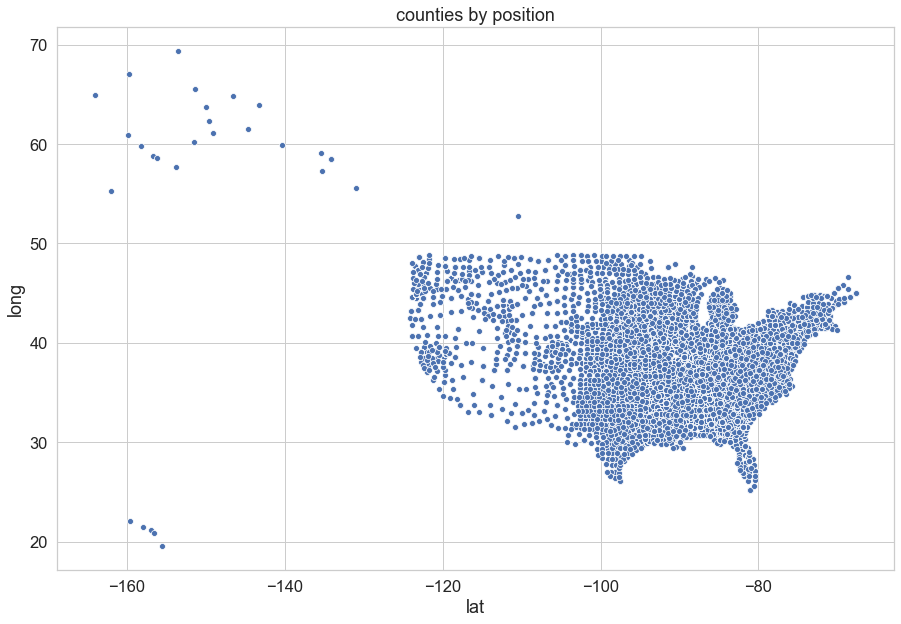

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(x="Long_", y="Lat", data=data)

# plt.ylim(0, 5)
# plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.xlabel('lat')
plt.ylabel('long')
plt.title('counties by position')

## KNN

### Notes on metric:

Unsupervised nearest neighbors is the foundation of many other learning methods.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. 

1) The number of samples can be a **user-defined constant** (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any 

2) metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Metric example--Taxicab geometry, also known as Manhattan Distance, commonly used in regression analysis, or LASSO
$$d1(\textbf{p}, \textbf{q}) = ||\textbf{p} - \textbf{q}||_1 =\sum_{k=1}^n |p_i - q_i|$$
where p, q are vectors

Metric example--Minkowski distance, which is good for sparse matrices. $$ D(X, Y) = \sum_{k=1}^n (|x_i - y_i|^p)^\frac{1}{p}$$

In [7]:
from sklearn.cluster import KMeans

numCluster = 100

kmeans = KMeans(n_clusters=numCluster, random_state=0)
kmeans.fit(X)

y = kmeans.labels_

numCounty = math.ceil(X.shape[0]/numCluster)

print(y), len(y) == X.shape[0], max(y), print("number of county in each cluster is approximately " + str(numCounty))

[55 17 17 ... 66 66 60]
number of county in each cluster is approximately 150


(None, True, 99, None)

In [8]:
# predict which cluster a newly given point belongs to 
print(kmeans.predict([[32, -86], [33, -83]]))

[55  6]


Text(0.5, 1.0, 'counties by cluster')

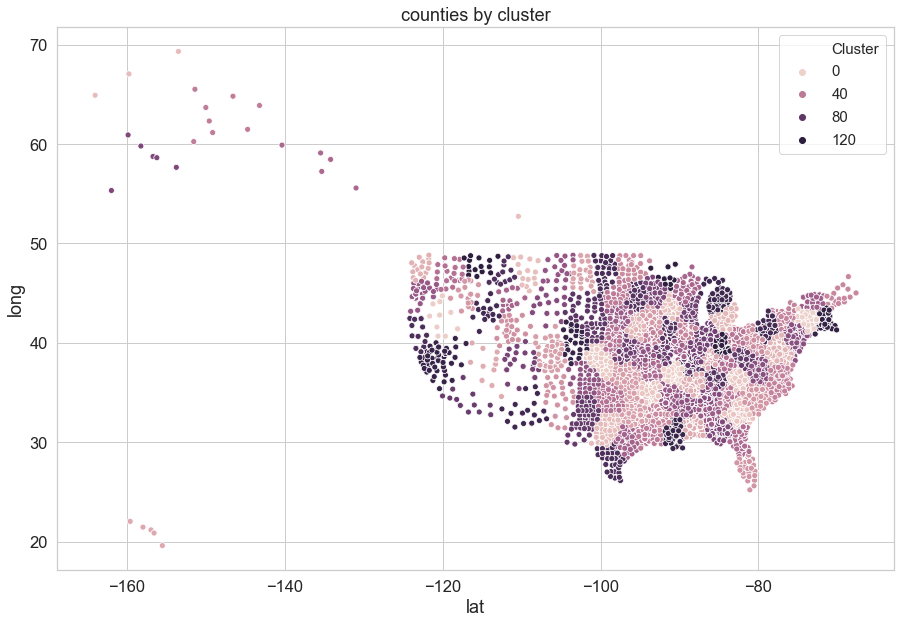

In [9]:
df = df = np.c_[X, kmeans.labels_]

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(x="X", y="Y", hue = 'Cluster', data=pd.DataFrame(df, columns=['Y', 'X', 'Cluster']), )


# plt.ylim(0, 5)
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.xlabel('lat')
plt.ylabel('long')
plt.title('counties by cluster')

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Map_of_USA_with_state_names_2.svg/550px-Map_of_USA_with_state_names_2.svg.png", width=500)


array([[  42.42901341,  -73.71337486],
       [  37.07358255,  -90.4889119 ],
       [  42.87106851, -120.09646401],
       [  38.28781987, -100.20693445],
       [  36.3715651 ,  -82.68892501]])

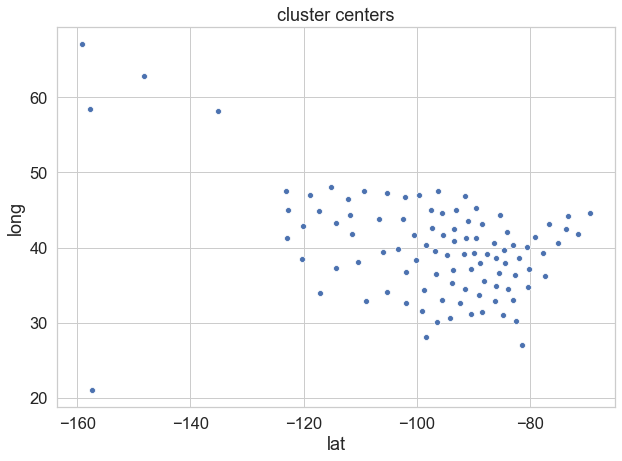

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.scatterplot(x="X", y="Y", data=pd.DataFrame(kmeans.cluster_centers_, columns=['Y', 'X']))

# plt.ylim(0, 5)
# plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.xlabel('lat')
plt.ylabel('long')
plt.title('cluster centers')

kmeans.cluster_centers_[0:5]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier(n_neighbors = 150)
KNNClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=150, p=2,
                     weights='uniform')

In [25]:
print("[37.781344, -96.838785] belongs to cluster " + str(KNNClassifier.predict([[37.781344, -96.838785]])))
prob_test1 = KNNClassifier.predict_proba([[37.781344, -96.838785]])

print("[37.209462, -86.687488] belongs to cluster " + str(KNNClassifier.predict([[37.209462, -86.687488]])))
prob_test2 = KNNClassifier.predict_proba([[37.209462, -86.687488]])


[37.781344, -96.838785] belongs to cluster [23]
[37.209462, -86.687488] belongs to cluster [82]


In [26]:
county_clustered = data
county_clustered['cluster'] = y
county_clustered.head()

,UID,Lat,Long_,cluster
0,84001001,32.539527,-86.644082,55
1,84001003,30.727750,-87.722071,17
2,84001003,30.727750,-87.722071,17
3,84013009,33.068823,-83.247017,6
4,84013009,33.068823,-83.247017,6


In [40]:
print(np.std(np.unique(y, return_counts=True)[1]))
np.unique(y, return_counts=True)[1]

89.22583650490479


array([113, 236,  27, 101, 309, 236, 339, 134,  30,   3,  82, 154, 204,
       353,  62, 225,  81, 182,   5, 310,  69, 170, 137, 175, 167,  99,
       240,  80,  55,  85, 257,  83, 223, 140, 106, 130, 221, 179,   8,
        94, 118, 304, 233, 170, 154, 126, 366, 200, 193,   6,  99, 100,
       171, 183, 182, 190, 189, 210, 174,  51, 229,  94, 254, 225, 188,
       231,  45, 280,   6, 111,  56, 162, 134, 256, 205, 247,  20,  82,
       280, 108, 326,  74, 245, 136, 225,  41,  44,  50,  62, 115,  50,
        36,  88, 258,  70, 132,  81, 243,  36,  53])